<a href="https://colab.research.google.com/github/aglucaci/HyPhy_Plots/blob/main/HyPhy_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Designed to aide in the visualization and interpretation of codon sequence analysis via HyPhy**

In [ ]:
# Get sample data, in this case we use some fitters generated for Neurotrophin analysis

# FEL
!wget -O BDNF_FEL.json https://raw.githubusercontent.com/aglucaci/EvolutionOfNeurotrophins/hyphy-specific/analysis/BDNF_codons_renamed.fasta_codon_macse.fas.FEL.json

# MEME
!wget -O BDNF_MEME.json https://raw.githubusercontent.com/aglucaci/EvolutionOfNeurotrophins/hyphy-specific/analysis/BDNF_codons_renamed.fasta_codon_macse.fas.MEME.json

# FUBAR
!wget -O BDNF_FUBAR.json https://raw.githubusercontent.com/aglucaci/EvolutionOfNeurotrophins/hyphy-specific/analysis/BDNF_codons_renamed.fasta_codon_macse.fas.FUBAR.json

# BUSTEDS
!wget -O BDNF_BUSTEDS.json https://raw.githubusercontent.com/aglucaci/EvolutionOfNeurotrophins/hyphy-specific/analysis/BDNF_codons_renamed.fasta_codon_macse.fas.BUSTEDS.json

# TN93
!wget -O BDNF_TN93.dst https://raw.githubusercontent.com/aglucaci/EvolutionOfNeurotrophins/hyphy-specific/analysis/BDNF_codons_renamed.fasta_codon_macse.fas.dst

# aBSREL
!wget -O BDNF_ABSREL.json https://raw.githubusercontent.com/aglucaci/EvolutionOfNeurotrophins/hyphy-specific/analysis/BDNF_codons_renamed.fasta_codon_macse.fas.ABSREL.json

--2021-02-09 19:28:41--  https://raw.githubusercontent.com/aglucaci/EvolutionOfNeurotrophins/hyphy-specific/analysis/BDNF_codons_renamed.fasta_codon_macse.fas.FEL.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167359 (163K) [text/plain]
Saving to: ‘BDNF_FEL.json’

BDNF_FEL.json       100%[===================>] 163.44K  --.-KB/s    in 0.02s   

2021-02-09 19:28:41 (9.83 MB/s) - ‘BDNF_FEL.json’ saved [167359/167359]

--2021-02-09 19:28:42--  https://raw.githubusercontent.com/aglucaci/EvolutionOfNeurotrophins/hyphy-specific/analysis/BDNF_codons_renamed.fasta_codon_macse.fas.MEME.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubuserconte

In [ ]:
# Installers

!pip install PyQt5
!pip install ete3
!pip install biopython

     |████████████████████████████████| 2.3MB 8.5MB/s 


In [ ]:
#Imports
import json
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from collections import Counter
import plotly.express as px
import csv
import os, sys
import scipy.stats as st
from matplotlib.pyplot import figure
import seaborn as sns 
import plotly.graph_objects as go

In [ ]:
!ls -lhSa

total 29M
-rw-r--r-- 1 root root  12M Feb  9 17:02 BDNF_MEME.json
-rw-r--r-- 1 root root 5.6M Feb  9 16:41 BDNF_codons_renamed.fasta_codon_macse.fas.FUBAR.json
-rw-r--r-- 1 root root 5.6M Feb  9 16:51 BDNF_codons_renamed.fasta_codon_macse.fas.FUBAR.json.1
-rw-r--r-- 1 root root 5.6M Feb  9 17:02 BDNF_FUBAR.json
-rw-r--r-- 1 root root 281K Feb  9 17:02 BDNF_BUSTEDS.json
-rw-r--r-- 1 root root 164K Feb  9 17:02 BDNF_FEL.json
drwxr-xr-x 1 root root 4.0K Feb  9 17:02 .
drwxr-xr-x 1 root root 4.0K Feb  9 16:09 ..
drwxr-xr-x 1 root root 4.0K Feb  5 15:13 .config
drwxr-xr-x 1 root root 4.0K Feb  4 15:26 sample_data


# **FEL Plots**

In [ ]:
# FEL plots

with open("BDNF_FEL.json") as json_handle :
    data = json.load(json_handle)
#end with

# Fetch MLE data for this plot
MLE = data["MLE"]["content"]["0"]


# Load data into a dataframe, makes it easier to plot.
df = pd.DataFrame (MLE,columns=['alpha',
                                  'beta',
                                  'alpha=beta', 
                                  'LRT', 
                                  'p-value', 
                                  'TotalBranchLength'])
# Set up omega
omega = df["beta"] /df["alpha"]
df["omega"] = omega

# 1-index the sites
df.index += 1

#Display dataframe
df


,alpha,beta,alpha=beta,LRT,p-value,TotalBranchLength,omega
1,0.000000,0.000000,0.000000,0.000000,1.000000,0,NaN
2,8526.832128,0.097349,0.193711,5.112977,0.023748,0,0.000011
3,0.338715,0.375494,0.365022,0.007763,0.929791,0,1.108581
4,0.468680,0.709086,0.630546,0.121227,0.727708,0,1.512941
5,0.671108,0.750051,0.726862,0.013637,0.907036,0,1.117632
...,...,...,...,...,...,...,...
630,19.469575,1.889022,4.669656,0.537810,0.463342,0,0.097024
631,1.500000,59.000000,4999.500000,-0.017590,1.000000,0,39.333333
632,122.508772,0.000000,1.328137,3.910906,0.047974,0,0.000000
633,10000.000000,1.783870,3.654163,1.197362,0.273849,0,0.000178


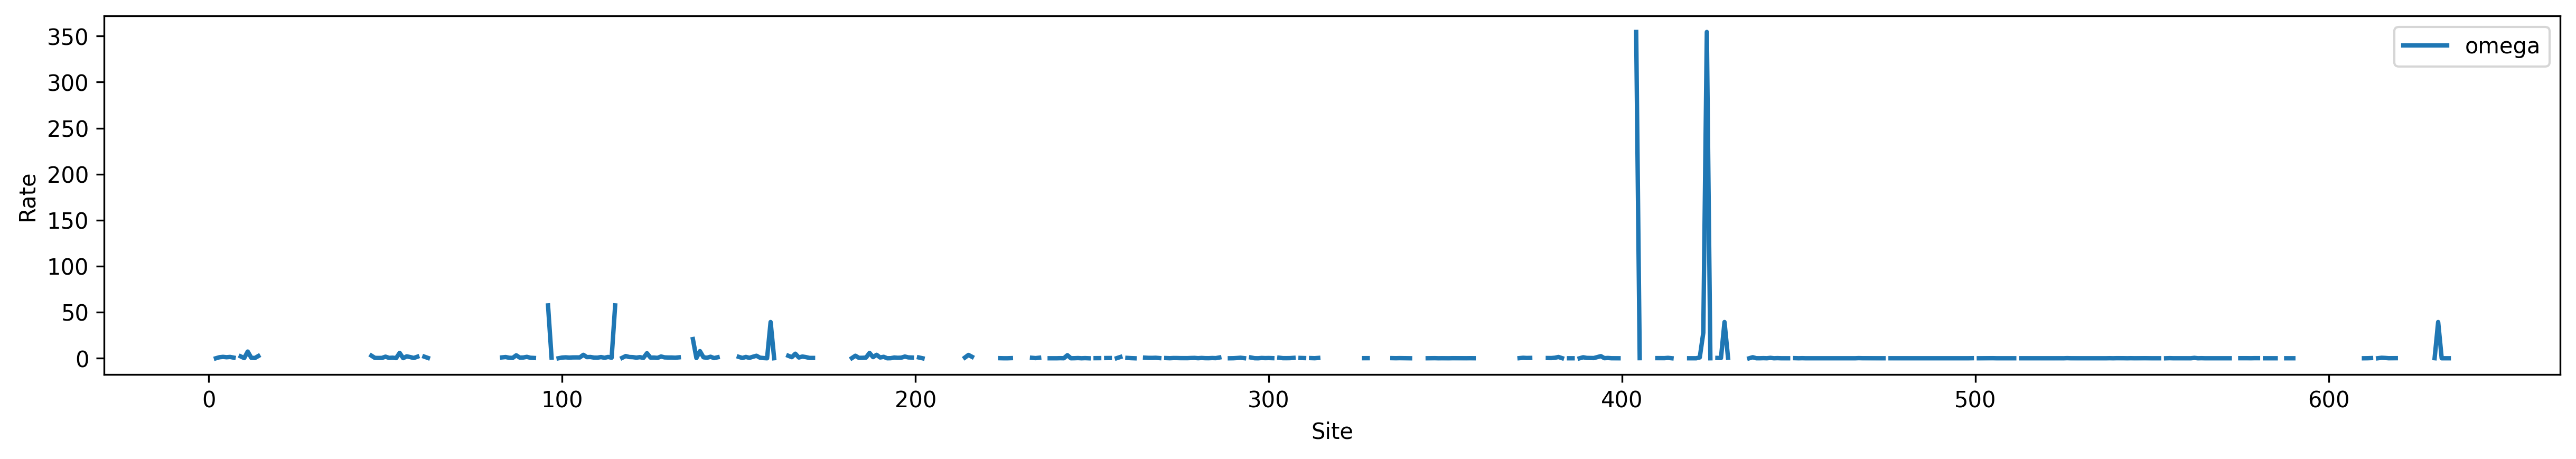

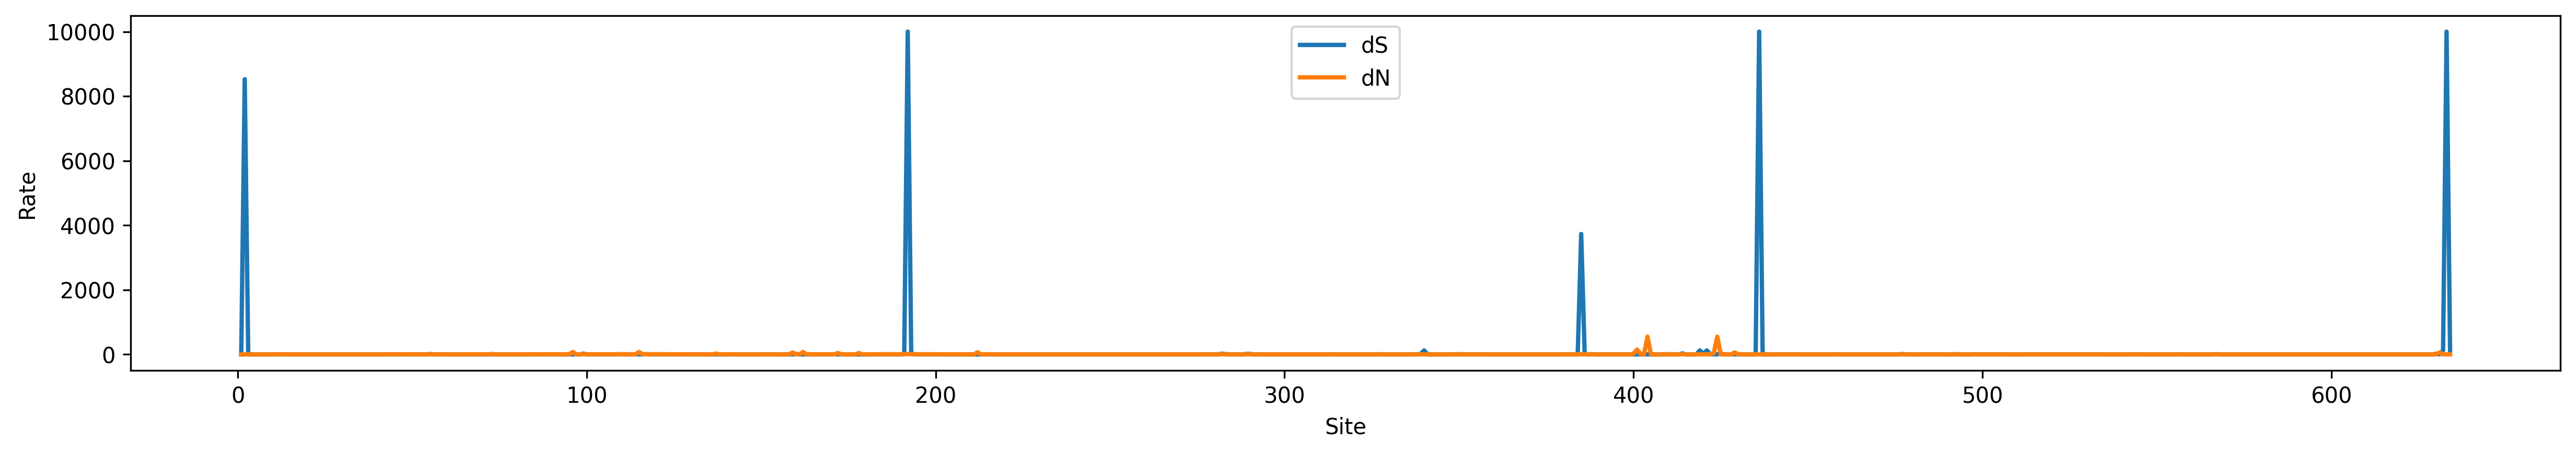

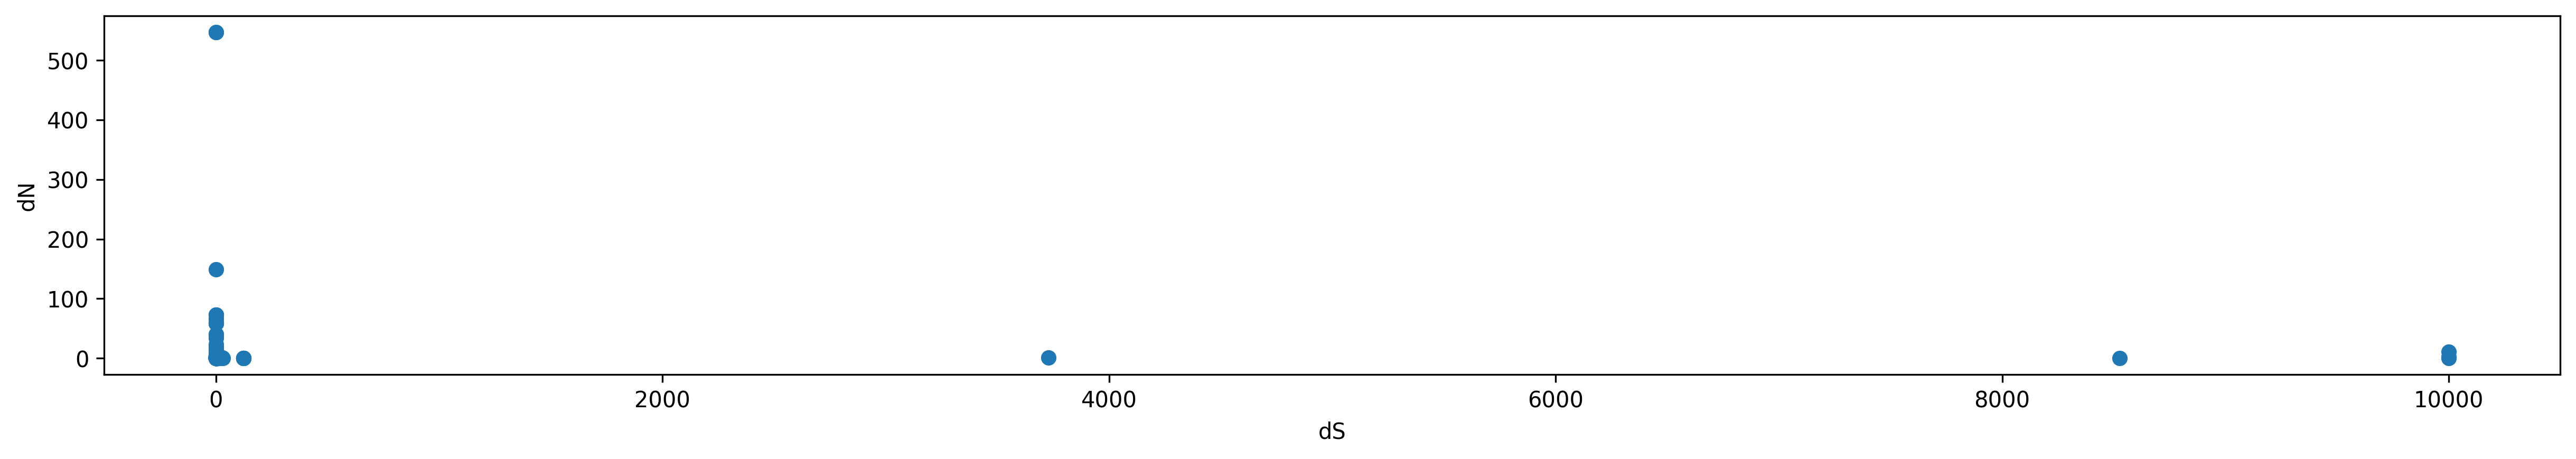

In [ ]:
# Plots
plt.rcParams["figure.figsize"] = (20,3)
plt.rcParams["figure.dpi"] = 300

# plot number 1
#plt.plot(df["alpha"], label="dS", linewidth=2, markersize=0, marker='o')
#plt.plot(df["beta"], label="dN", linewidth=2, markersize=0, marker='o')
plt.plot(df["omega"], label="omega", linewidth=2, markersize=0, marker='o')
#plt.plot(np.log(df["omega"]), label="omega", linewidth=2, markersize=0, marker='o')
plt.xlabel("Site")
plt.ylabel("Rate")
plt.title('')
plt.legend()
plt.show()

# plot number 2
plt.plot(df["alpha"], label="dS", linewidth=2, markersize=0, marker='o')
plt.plot(df["beta"], label="dN", linewidth=2, markersize=0, marker='o')
plt.xlabel("Site")
plt.ylabel("Rate")
plt.legend()
plt.show()


# plot number 3
plt.scatter(x=df["alpha"], y=df["beta"])
#plt.plot(df["beta"], label="dN", linewidth=2, markersize=0, marker='o')
plt.xlabel("dS")
plt.ylabel("dN")
#plt.legend()
plt.show()





# **MEME Plots**

In [ ]:
# MEME plots
with open("BDNF_MEME.json") as json_handle :
    data = json.load(json_handle)
#end with
# Fetch MLE data for this plot
MLE = data["MLE"]["content"]["0"]
# Load data into a dataframe, makes it easier to plot.
df = pd.DataFrame (MLE,columns=['alpha',
                                  'beta-',
                                  'p-', 
                                  'beta+', 
                                  'p+', 
                                  'LRT' ,
                                  'p-value',
                                  'num_branches',
                                  'TotalBranchLength',
                                  'MEME_LogL',
                                  'FEL_LogL'])
# 1-index the sites
df.index += 1

#Display dataframe
df


,alpha,beta-,p-,beta+,p+,LRT,p-value,num_branches,TotalBranchLength,MEME_LogL,FEL_LogL
1,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,1.000000,0,0,0.000000,0.000000
2,10000.000000,0.095691,1.000000,3.645324,0.000000,0.000000e+00,0.666667,0,0,-10.047562,-10.047562
3,0.340686,0.000000,0.060000,0.375421,0.940000,1.515223e-02,0.634509,0,0,-18.519908,-18.512592
4,0.000000,0.000000,0.946634,50.343190,0.053366,5.841145e+00,0.024461,1,0,-26.987381,-24.127373
5,0.658622,0.008546,0.022911,0.790273,0.977089,2.087511e-02,0.628395,0,0,-28.618787,-28.616259
...,...,...,...,...,...,...,...,...,...,...,...
630,159.000000,2.018868,1.000000,0.991684,0.000000,0.000000e+00,0.666667,0,0,-7.646046,-7.646046
631,2.298969,0.000000,0.010000,10000.000000,0.990000,-4.178347e-11,0.666667,0,0,-8.261853,-8.261853
632,52.333333,0.000000,1.000000,78.500000,0.000000,0.000000e+00,0.666667,0,0,-6.037142,-6.037142
633,10000.000000,1.783870,1.000000,1.461179,0.000000,0.000000e+00,0.666667,0,0,-8.777398,-8.777398


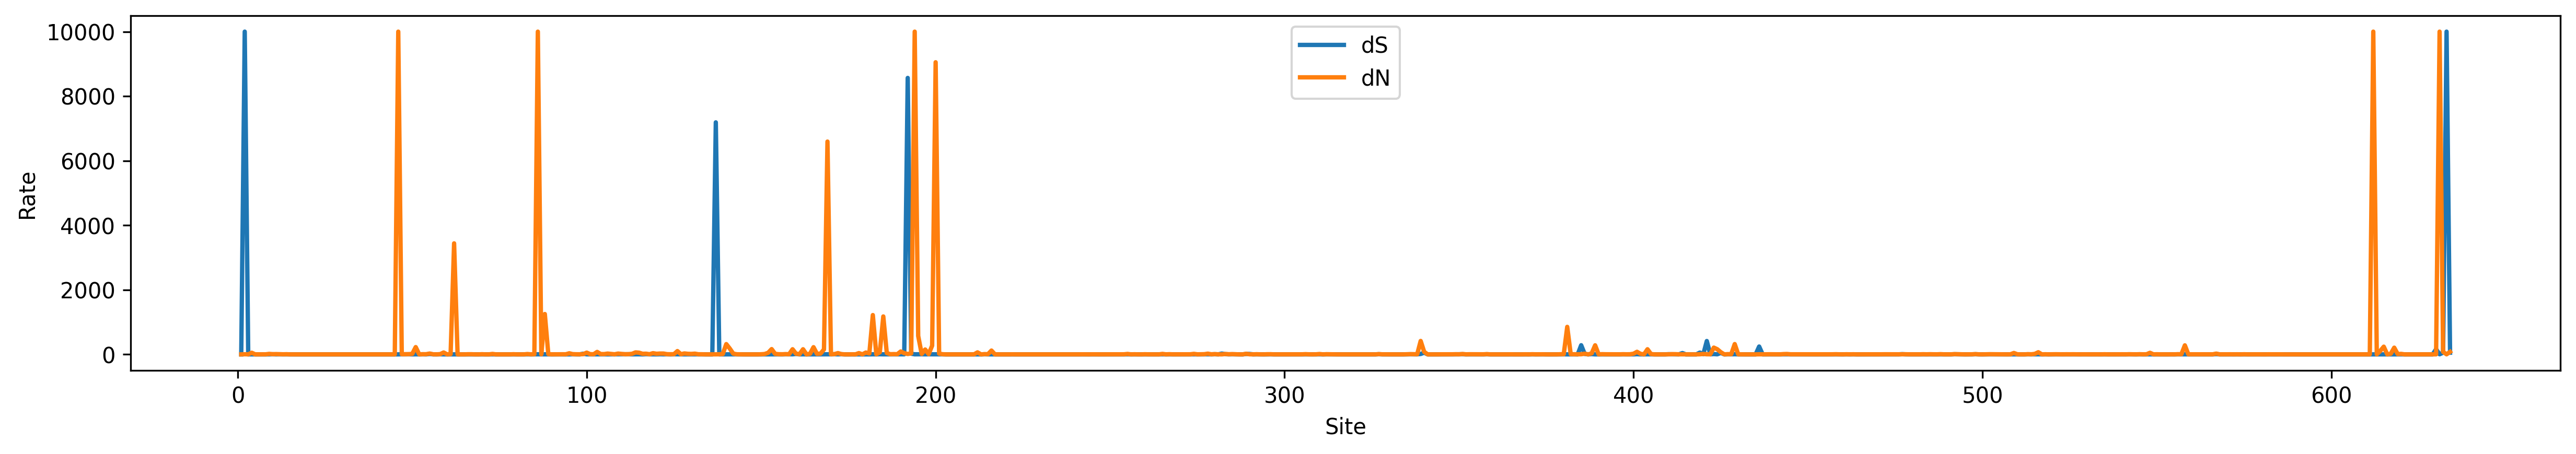

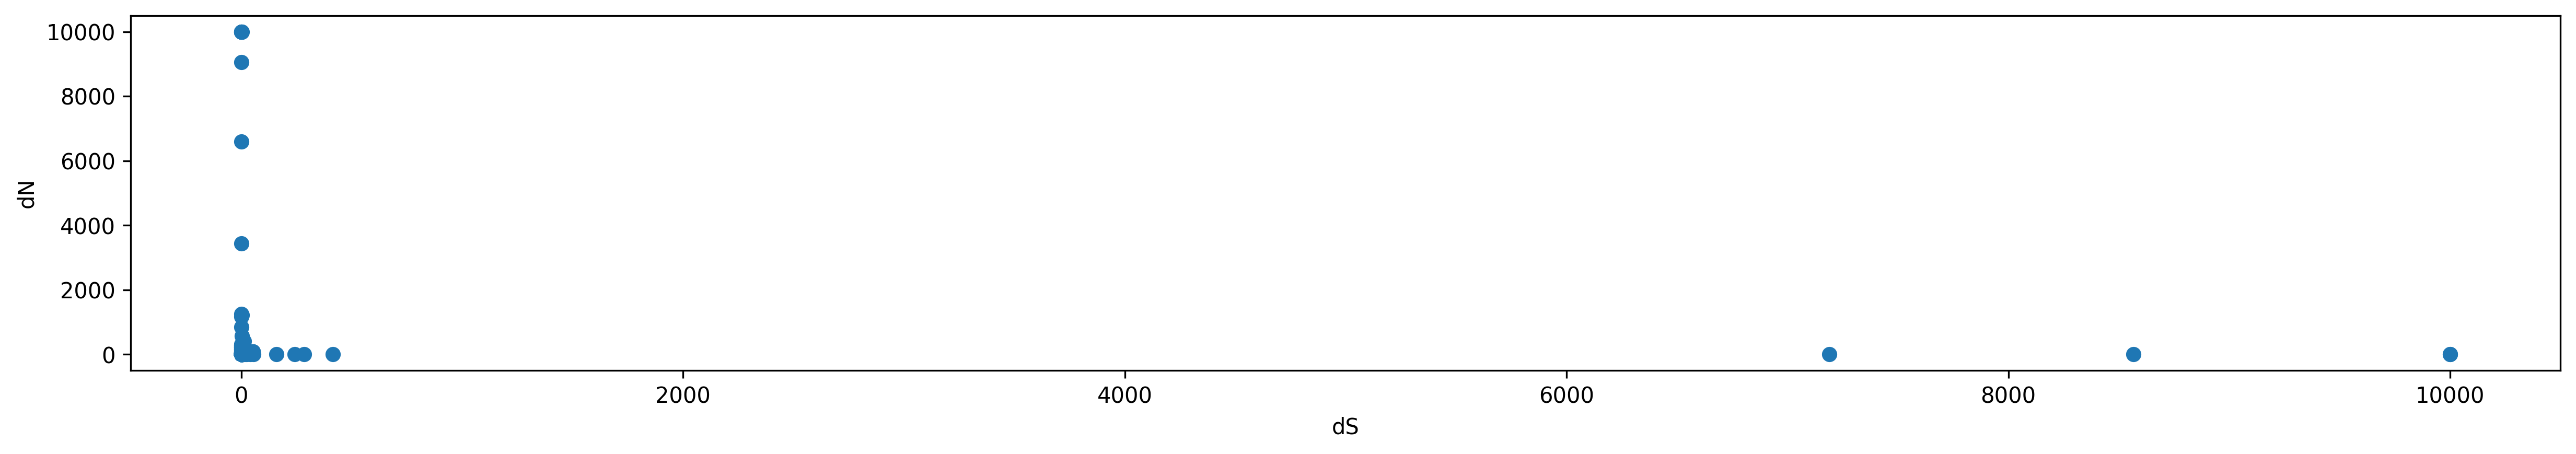

In [ ]:
# Plots
plt.rcParams["figure.figsize"] = (20,3)
plt.rcParams["figure.dpi"] = 300

# plot number 1
plt.plot(df["alpha"], label="dS", linewidth=2, markersize=0, marker='o')
plt.plot(df["beta+"], label="dN", linewidth=2, markersize=0, marker='o')
plt.xlabel("Site")
plt.ylabel("Rate")
plt.title('')
plt.legend()
plt.show()


# plot number 2
# Can maybe color by Site or value
plt.scatter(x=df["alpha"], y=df["beta+"])
plt.xlabel("dS")
plt.ylabel("dN")
plt.show()


# **FUBAR Plots**

In [ ]:
# MEME plots
with open("BDNF_FUBAR.json") as json_handle :
    data = json.load(json_handle)
#end with

# Fetch MLE data for this plot
MLE = data["MLE"]["content"]["0"]

# Load data into a dataframe, makes it easier to plot.
df = pd.DataFrame (MLE,columns=['alpha',
                                  'beta',
                                  'beta-alpha', 
                                  'beta+', 
                                  'P[a>b]', 
                                  'P[a<b]',
                                  'BayesFactor[a<b]', ''])
# 1-index the sites
df.index += 1

#Display dataframe
df


,alpha,beta,beta-alpha,beta+,P[a>b],P[a<b],BayesFactor[a<b],
1,3.435302,0.448400,-2.986902,0.847452,0.111763,0.427822,0,0
2,10.003033,0.371404,-9.631629,0.935722,0.053178,0.190967,0,0
3,0.900646,0.794617,-0.106030,0.441770,0.478740,3.122770,0,0
4,1.771869,1.669267,-0.102602,0.362288,0.381452,2.096817,0,0
5,1.984946,1.717913,-0.267032,0.378521,0.316541,1.574751,0,0
...,...,...,...,...,...,...,...,...
630,8.075106,8.124960,0.049854,0.424548,0.226397,0.995053,0,0
631,7.961898,19.714950,11.753052,0.143210,0.493469,3.312446,0,0
632,10.187563,1.417860,-8.769703,0.888001,0.038839,0.137395,0,0
633,10.128445,6.708056,-3.420389,0.533971,0.154870,0.623071,0,0


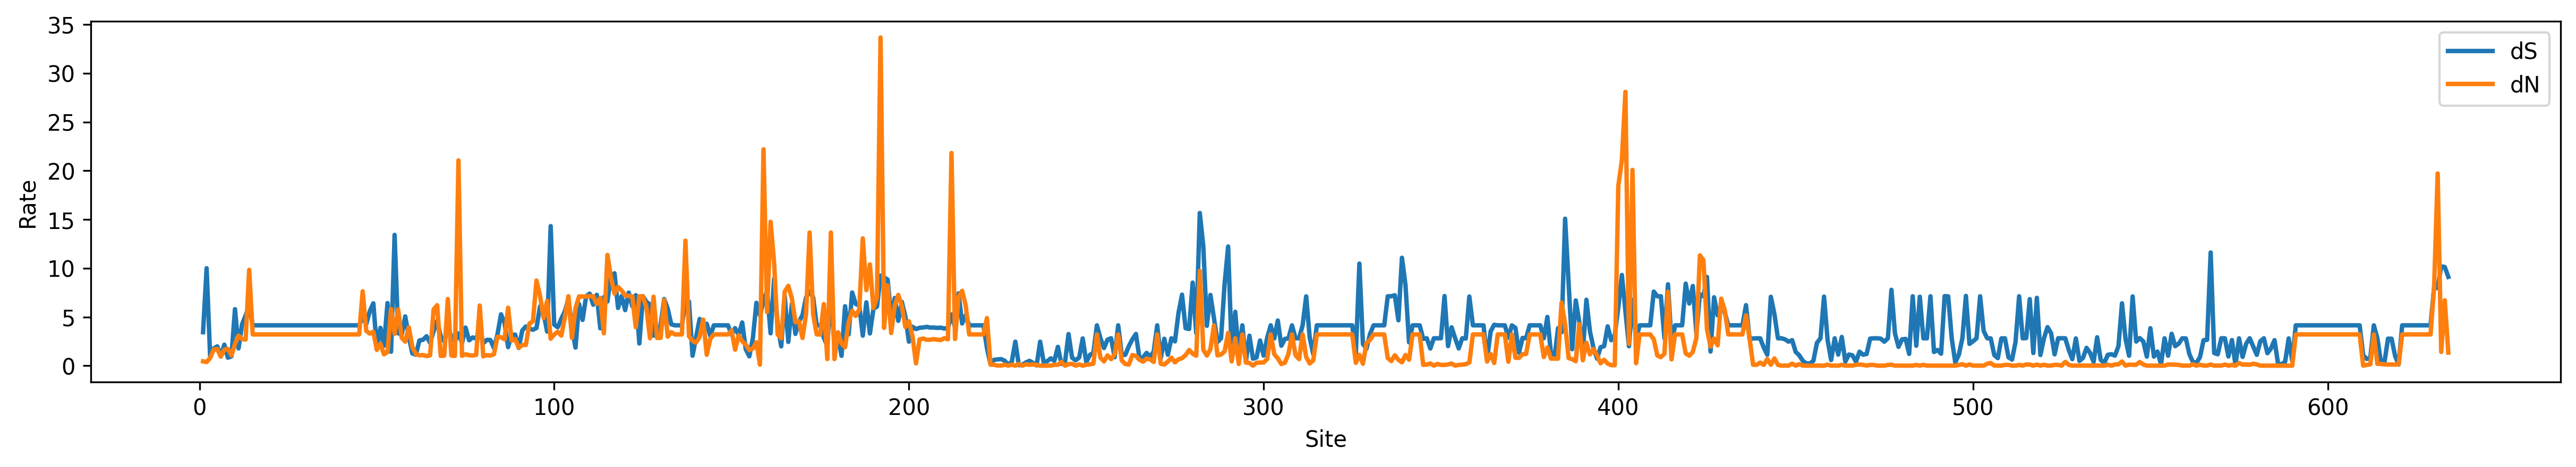

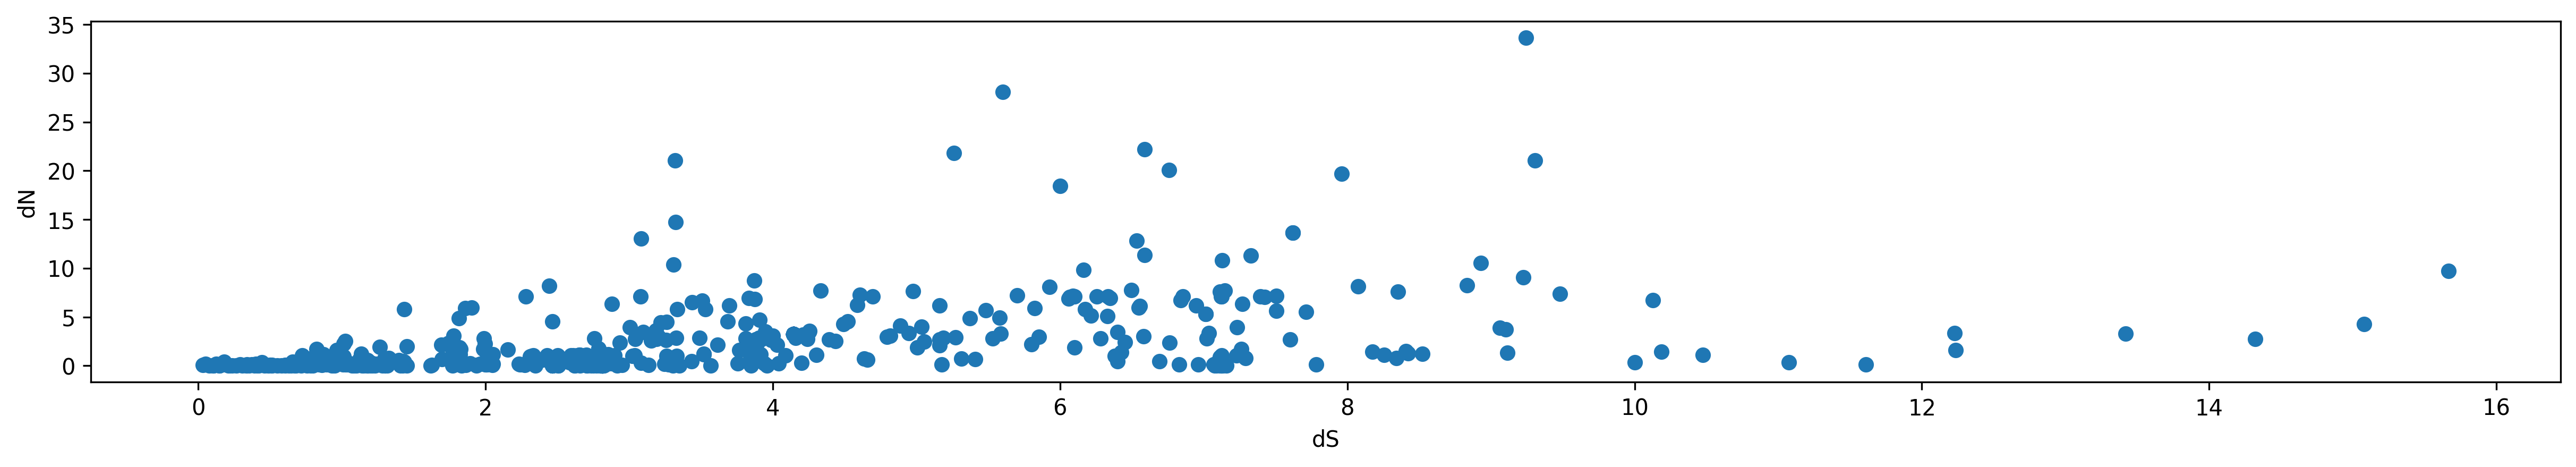

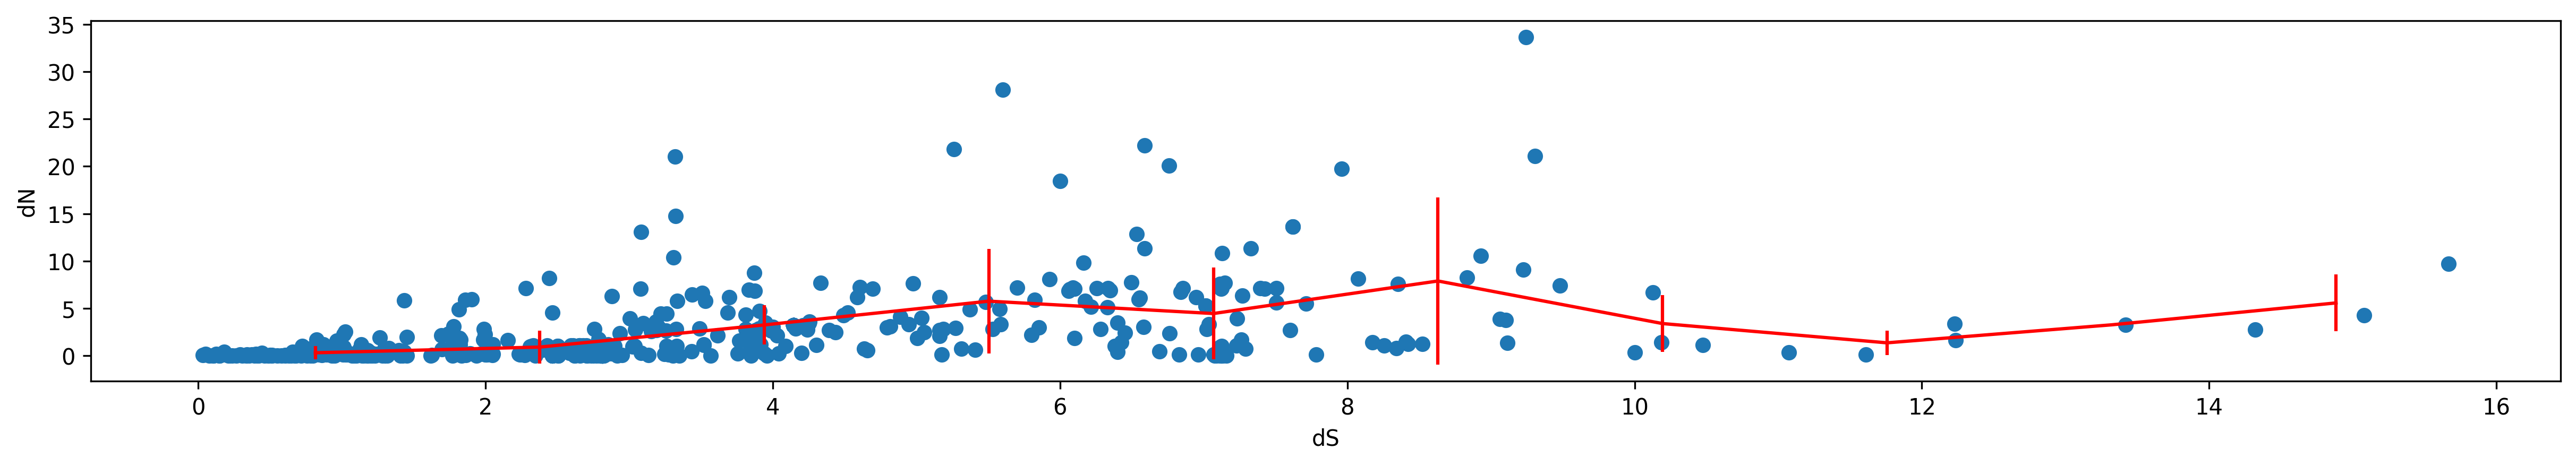

In [ ]:
# Plots
plt.rcParams["figure.figsize"] = (20,3)
plt.rcParams["figure.dpi"] = 300

# plot number 1
plt.plot(df["alpha"], label="dS", linewidth=2, markersize=0, marker='o')
plt.plot(df["beta"], label="dN", linewidth=2, markersize=0, marker='o')
plt.xlabel("Site")
plt.ylabel("Rate")
plt.title('')
plt.legend()
plt.show()


# plot number 2
# Can maybe color by Site or value
plt.scatter(x=df["alpha"], y=df["beta"])
plt.xlabel("dS")
plt.ylabel("dN")
plt.show()

# plot number 3 with error bars
nbins = 10
x = df["alpha"]
y = df["beta"]
n, _ = np.histogram(x, bins=nbins)
sy, _ = np.histogram(x, bins=nbins, weights=y)
sy2, _ = np.histogram(x, bins=nbins, weights=y*y)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)
plt.scatter(x=df["alpha"], y=df["beta"])
plt.errorbar((_[1:] + _[:-1])/2, mean, yerr=std, fmt='r-')
plt.xlabel("dS")
plt.ylabel("dN")
plt.show()


# **FUBAR Surface Plots**

In [ ]:
grid = data["grid"]
x2, y2, z2 = [], [] , []
for item in grid:
    x2.append(item[0])
    y2.append(item[1])
    z2.append(item[2])
df_grid = pd.DataFrame(data=[], index=sorted(set(x2)), columns=sorted(set(y2)))
for item in sorted(set(y2)): #loops across columns
    for index, row in df_grid.iteritems():
        alpha = index
        beta = item
        for entry in grid: #Search in grid.
            #print("# checking:", entry)
            a = entry[0]
            b = entry[1]
            weight = entry[2]
            if a == alpha and b == beta:
                df_grid[item][index] = weight
            #end if
        #end for
    #end for
#end for

In [ ]:
x, y = np.linspace(0, 50), np.linspace(0, 50)
fig = go.Figure(data=[go.Surface(z=df_grid.values, x=x, y=y)])
fig.update_layout(title='', autosize=False,
                  width=1000, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(font=dict(size=18))
fig.show()

# **BUSTEDS Plots**

In [ ]:
def process_BUSTEDS_json(json_file):
  print("Processing:", json_file)
  with open(json_file, "r") as in_d:
    json_data = json.load(in_d)
  #end with

  fits = json_data["fits"]["Unconstrained model"]
  tested = fits["Rate Distributions"]["Test"]

  return tested["0"]["omega"], tested["0"]["proportion"], tested["1"]["omega"], tested["1"]["proportion"], tested["2"]["omega"], tested["2"]["proportion"]
#end method

# Main
data_dict = {}
filename = "BDNF_BUSTEDS.json"

o1, o1p, o2, o2p, o3, o3p = process_BUSTEDS_json(filename)
data_dict["1"] = {"proportions": o1p, "name": "Omega_1", "value": o1}
data_dict["2"] = {"proportions": o2p, "name": "Omega_2", "value": o2}
data_dict["3"] = {"proportions": o3p, "name": "Omega_3", "value": o3}

df = pd.DataFrame.from_dict(data_dict, orient="index")
df
#print(df)
#labels = df['name'].tolist()
#proportions = df["proportions"].tolist() 
#values = df["value"].tolist() 


Processing: BDNF_BUSTEDS.json


,proportions,name,value
1,0.725372,Omega_1,0.014240
2,0.273985,Omega_2,0.430934
3,0.000643,Omega_3,182.989883


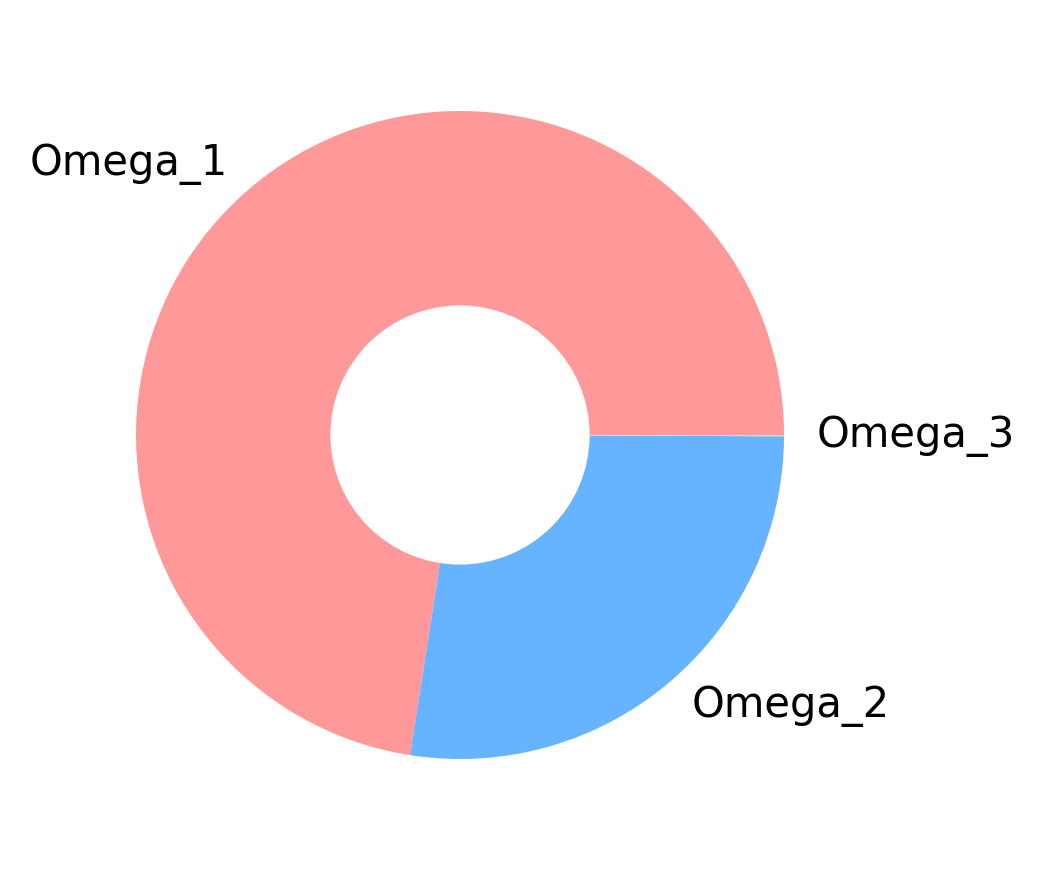

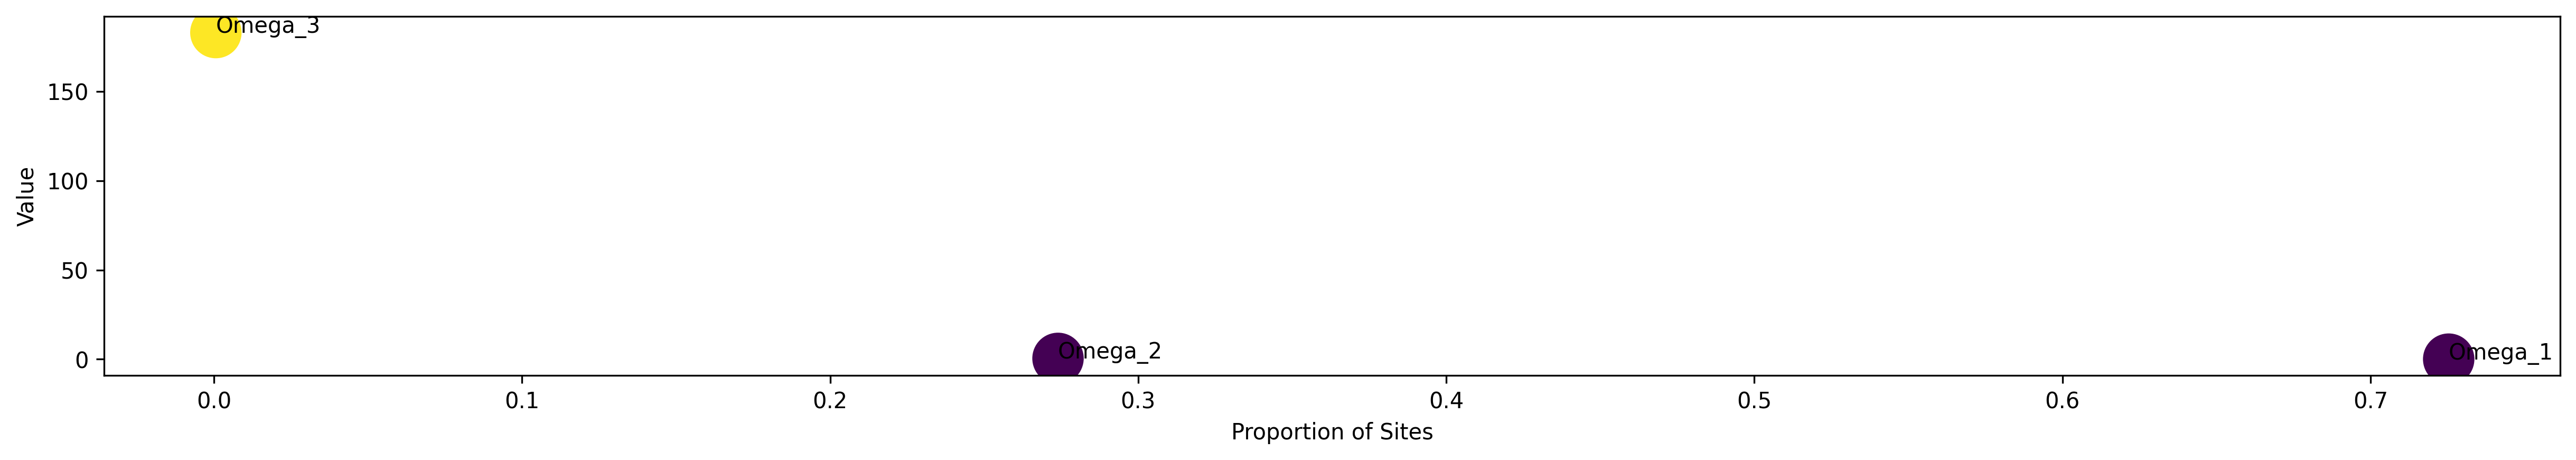

In [ ]:
colors = ['#ff9999','#66b3ff','#99ff99']
plt.rcParams["figure.figsize"] = (20,3)
plt.rcParams["figure.dpi"] = 300


# Plot number 1 - pie chart
plt.pie(df["proportions"], labels=df["name"], colors=colors)
#plt.legend()
plt.tight_layout()
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()


# Plot number 2 - scatter 
x = df["proportions"]
y = df["value"]
n = df["name"]
plt.scatter(x, y, c=y, s=500, label=df["name"])
plt.xlabel("Proportion of Sites")
plt.ylabel("Value")
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))

plt.show()


# **TN93**

In [ ]:
df = pd.read_csv("BDNF_TN93.dst")
df

,ID1,ID2,Distance
0,XM_037534737.1,XM_023810716.1,0.201868
1,XM_036325692.1,XM_028501134.1,0.093640
2,XM_019650718.1,XM_007653166.4,0.085188
3,XM_005654684.3,XM_023230347.2,0.066002
4,XM_016194241.1,XM_004851581.3,0.154877
...,...,...,...
50716,XM_010167688.2,XM_015338619.1,0.322229
50717,XM_030484817.1,XM_015338619.1,0.297047
50718,XM_019552325.1,XM_029846527.1,0.313145
50719,XM_030451239.1,XM_015338619.1,0.320310


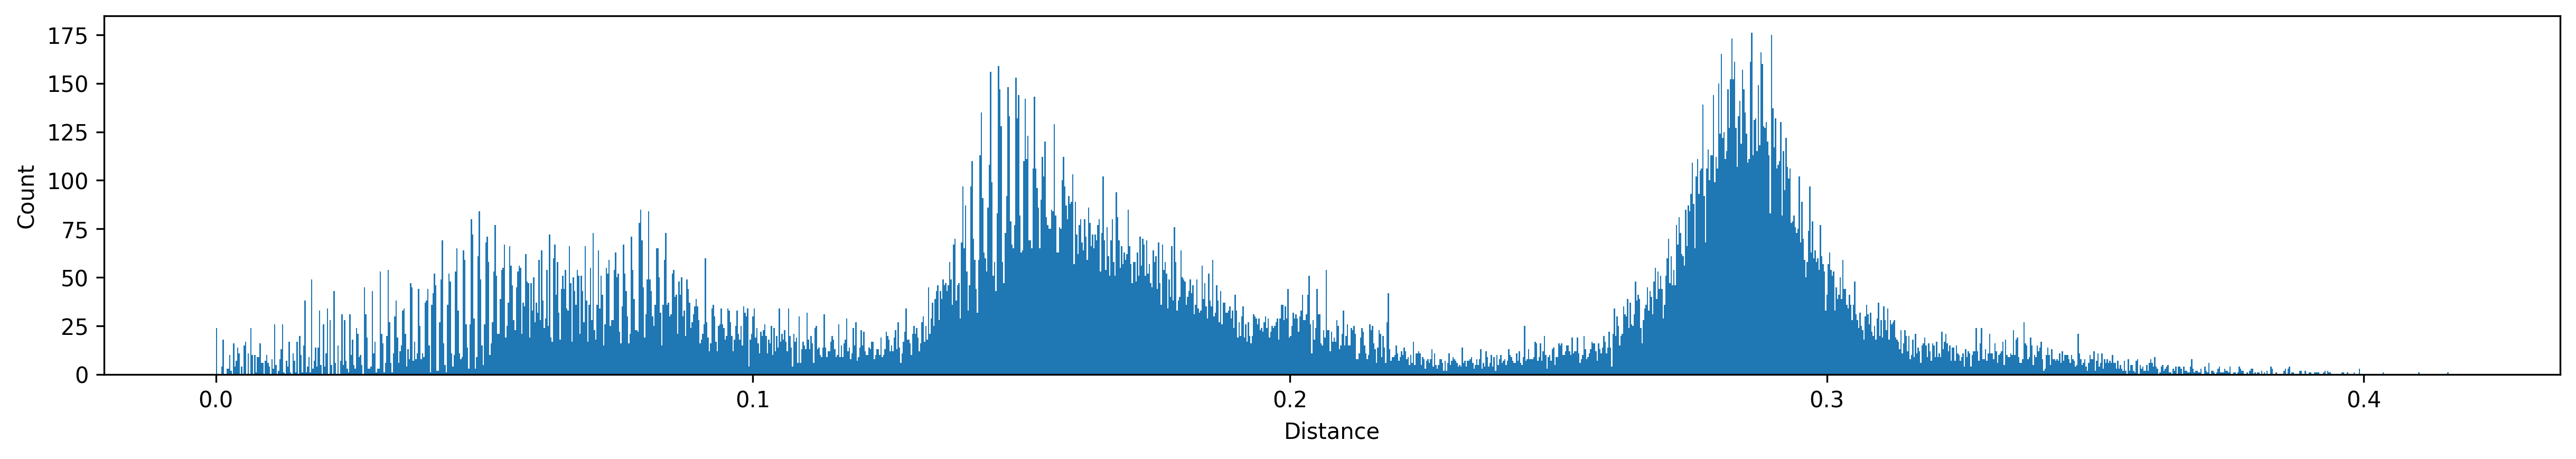

In [ ]:
#plt.plot(df["Distance"])
#plt.show()

plt.hist(df["Distance"], bins=int(len(df["Distance"])/30))
plt.ylabel("Count")
plt.xlabel("Distance")
plt.show()

#plt.scatter(x=df["Distance"])
#plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:649: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



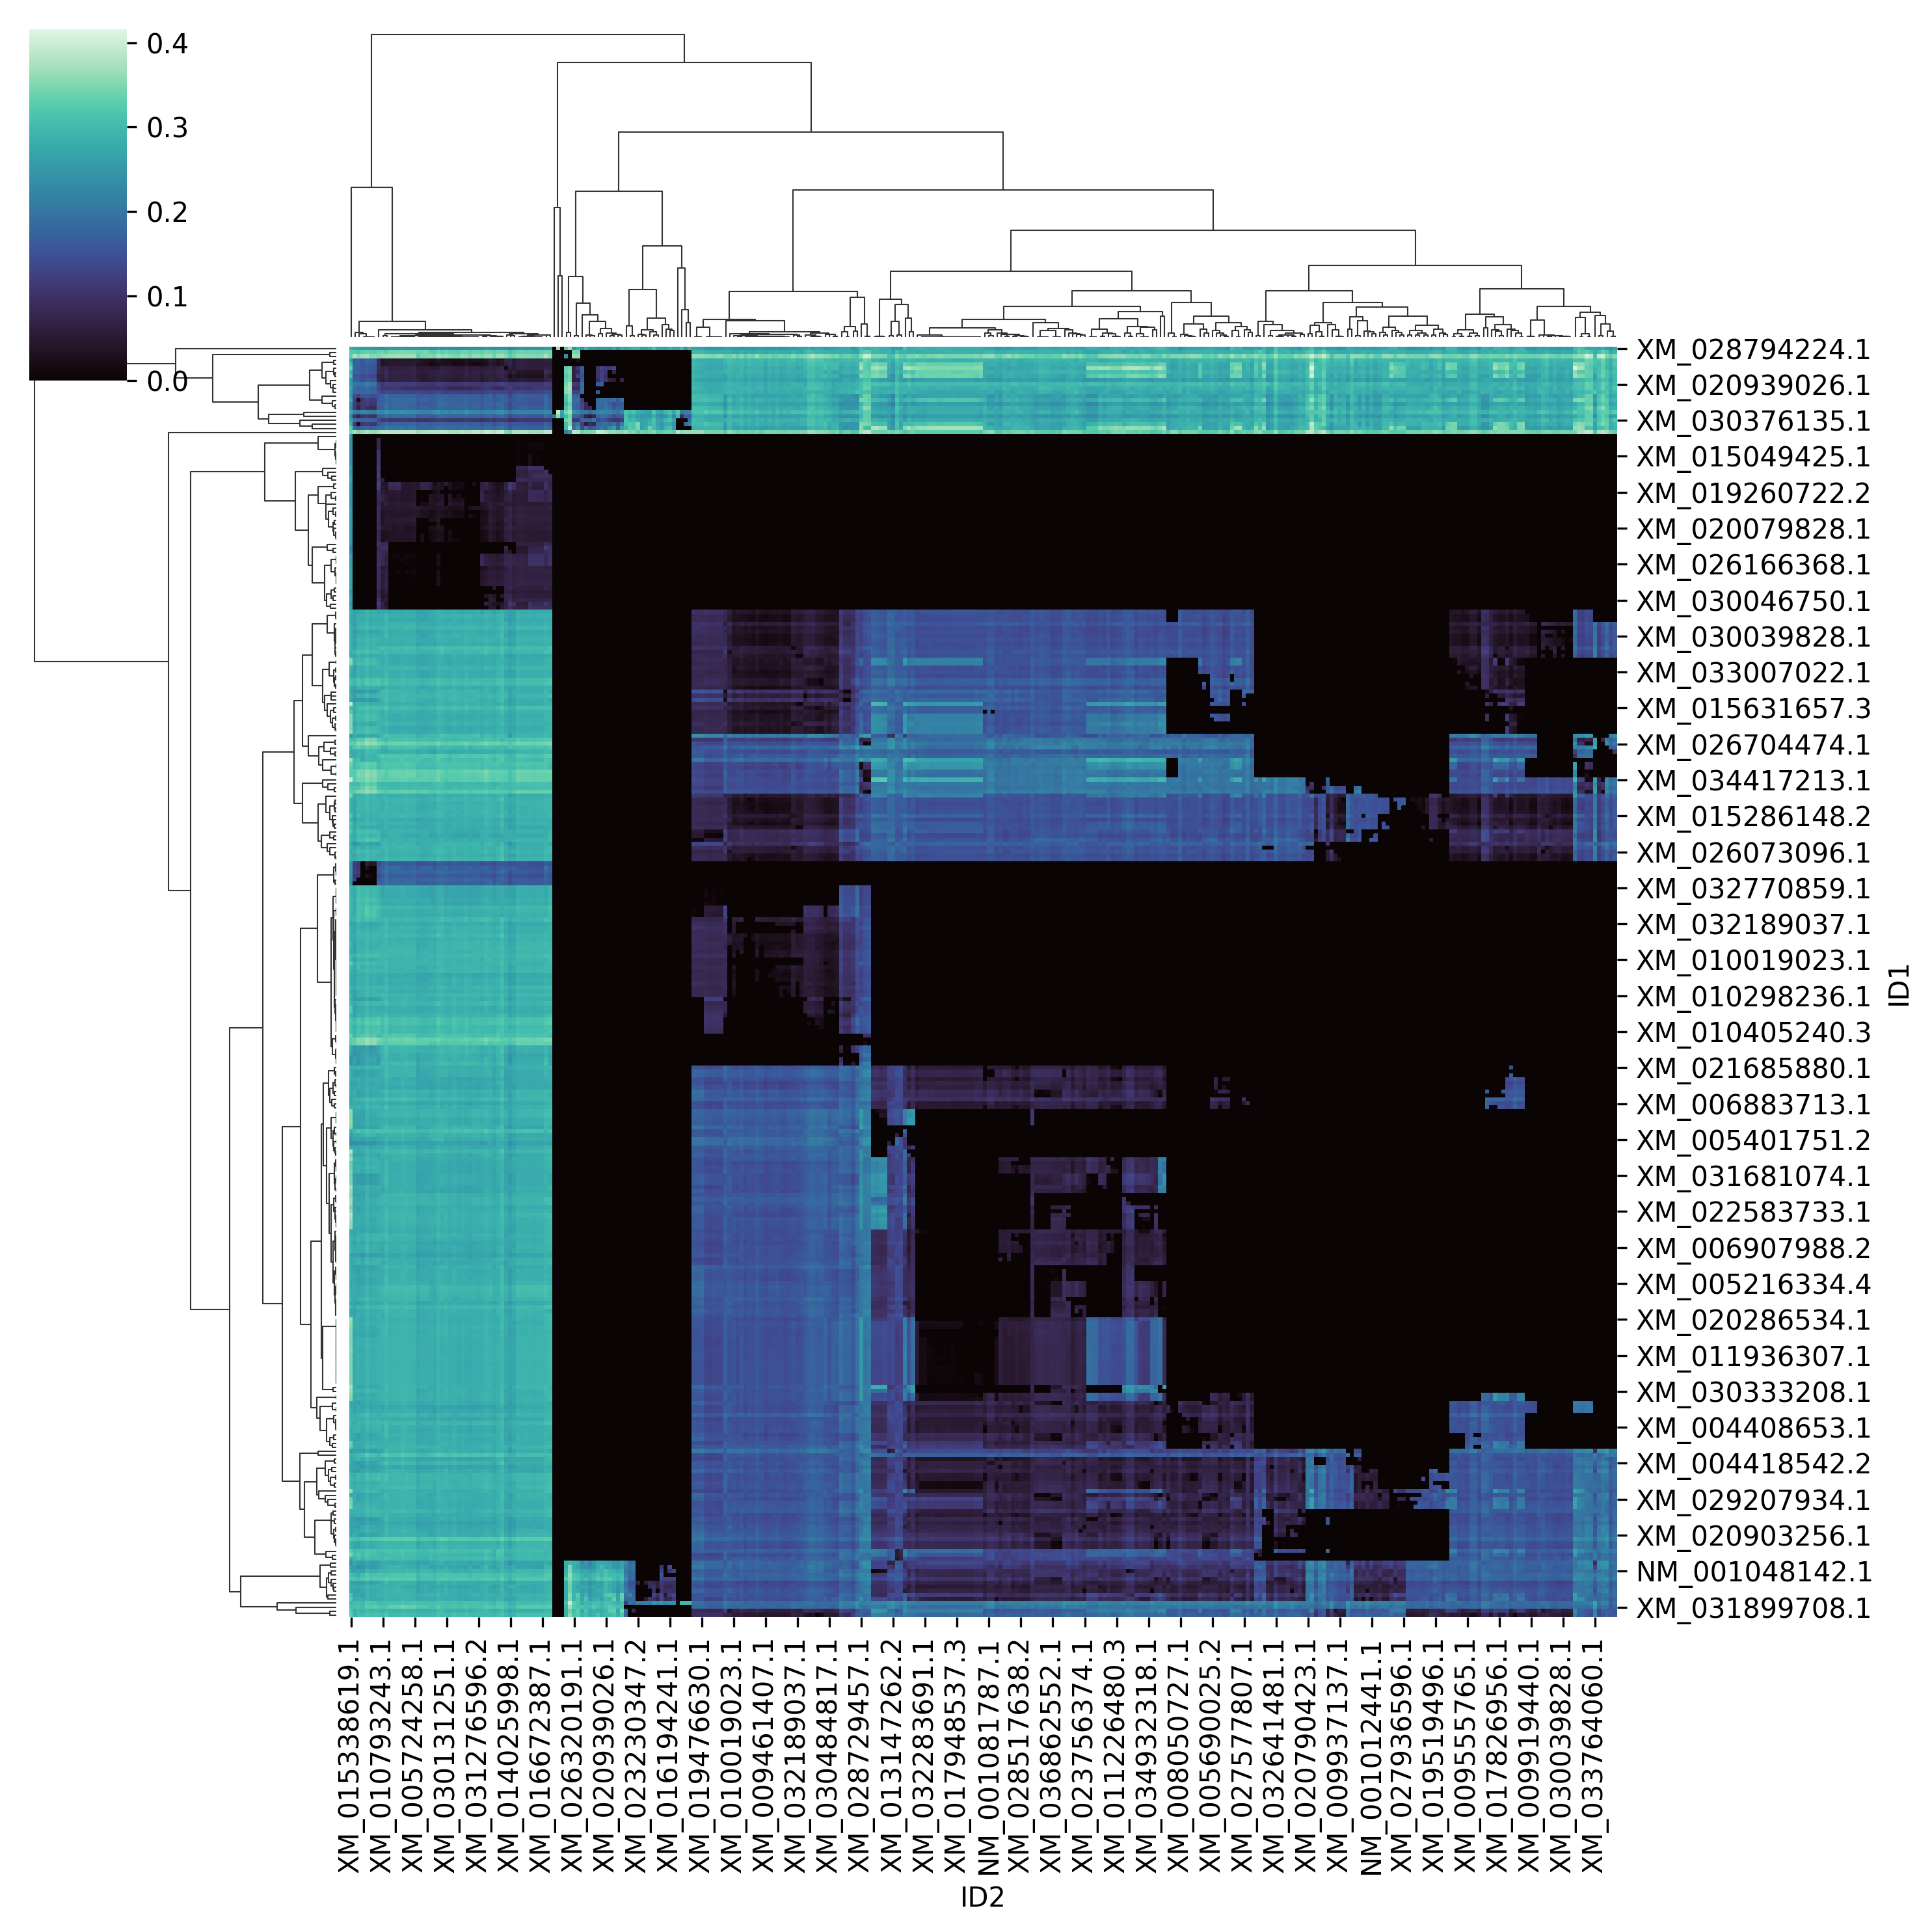

In [ ]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt

def first(): #heatmap, kind of useless
  global df
  #df = pd.read_clipboard()
  df = df.sort_values(by=["Distance"])
  table = df.pivot('ID1', 'ID2', 'Distance')
  #ax = sns.heatmap(table)
  #df.sort_values(by=['col1'])
  ax = sns.heatmap(table)
  ax.invert_yaxis()
  #print(table)
  plt.show()

def second(): # Clustermap
  global df
  #table = df.pivot('ID1', 'ID2', 'Distance')
  #ax = sns.clustermap(df.corr(), method='centroid')
  #ax.invert_yaxis()
  #print(table)
  #https://seaborn.pydata.org/generated/seaborn.clustermap.html
  #https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
  
  table = df.pivot('ID1', 'ID2', 'Distance')
  table = table.fillna(0)
  table
  #sns.clustermap(table, method='ward')
  #lut = dict(zip(df["ID2"].unique(), "rbg"))
  #row_colors = df["ID2"].map(lut)
  #sns.clustermap(table, metric='correlation', cmap="mako", row_colors=row_colors)
  sns.clustermap(table, metric='correlation', cmap="mako")
  plt.show()

#first()
second()

# **aBSREL**

Tree with branches selected.


In [ ]:
!pip3 uninstall PyQt5
!!pip3 install PyQt5
!pip install ete3
 

In [ ]:
import json
import PyQt5
from ete3 import Tree, TreeStyle

with open("BDNF_ABSREL.json") as json_handle :
    json_data = json.load(json_handle)
#end with

TREE = json_data["input"]["trees"]
#import PyQt5
#from ete3 import Tree, TreeStyle
t = Tree()
t.show()

In [ ]:
!pip3 install PyQt5

['Requirement already satisfied: PyQt5 in /usr/local/lib/python3.6/dist-packages (5.15.2)',
 'Requirement already satisfied: PyQt5-sip<13,>=12.8 in /usr/local/lib/python3.6/dist-packages (from PyQt5) (12.8.1)']